# Name:- Sojas Khandagale

# Github UserName:- sojas07

# USC ID:- 4955206780

## b) Exploring the data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx', engine='openpyxl')

In [3]:
column = ['Temperature','Vacuum','Ambient_Pressure','Relative_Humidity','electrical_energy']
df = pd.DataFrame(columns=column,data=df.values)
df.head()

,Temperature,Vacuum,Ambient_Pressure,Relative_Humidity,electrical_energy
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


i. How many rows are in this data set? How many columns? What do the rows
and columns represent?

In [4]:
rows,columns = df.shape
print("The number of rows are : ", rows)
print("The number of coulmns are : ", columns)

print("Each column represent the feature(characteristic) of each observation")
print("Each row represent the observation(instance)")

The number of rows are :  9568
The number of coulmns are :  5
Each column represent the feature(characteristic) of each observation
Each row represent the observation(instance)


ii. Make pairwise scatterplots of all the varianbles in the data set including the
predictors (independent variables) with the dependent variable. Describe
your findings.

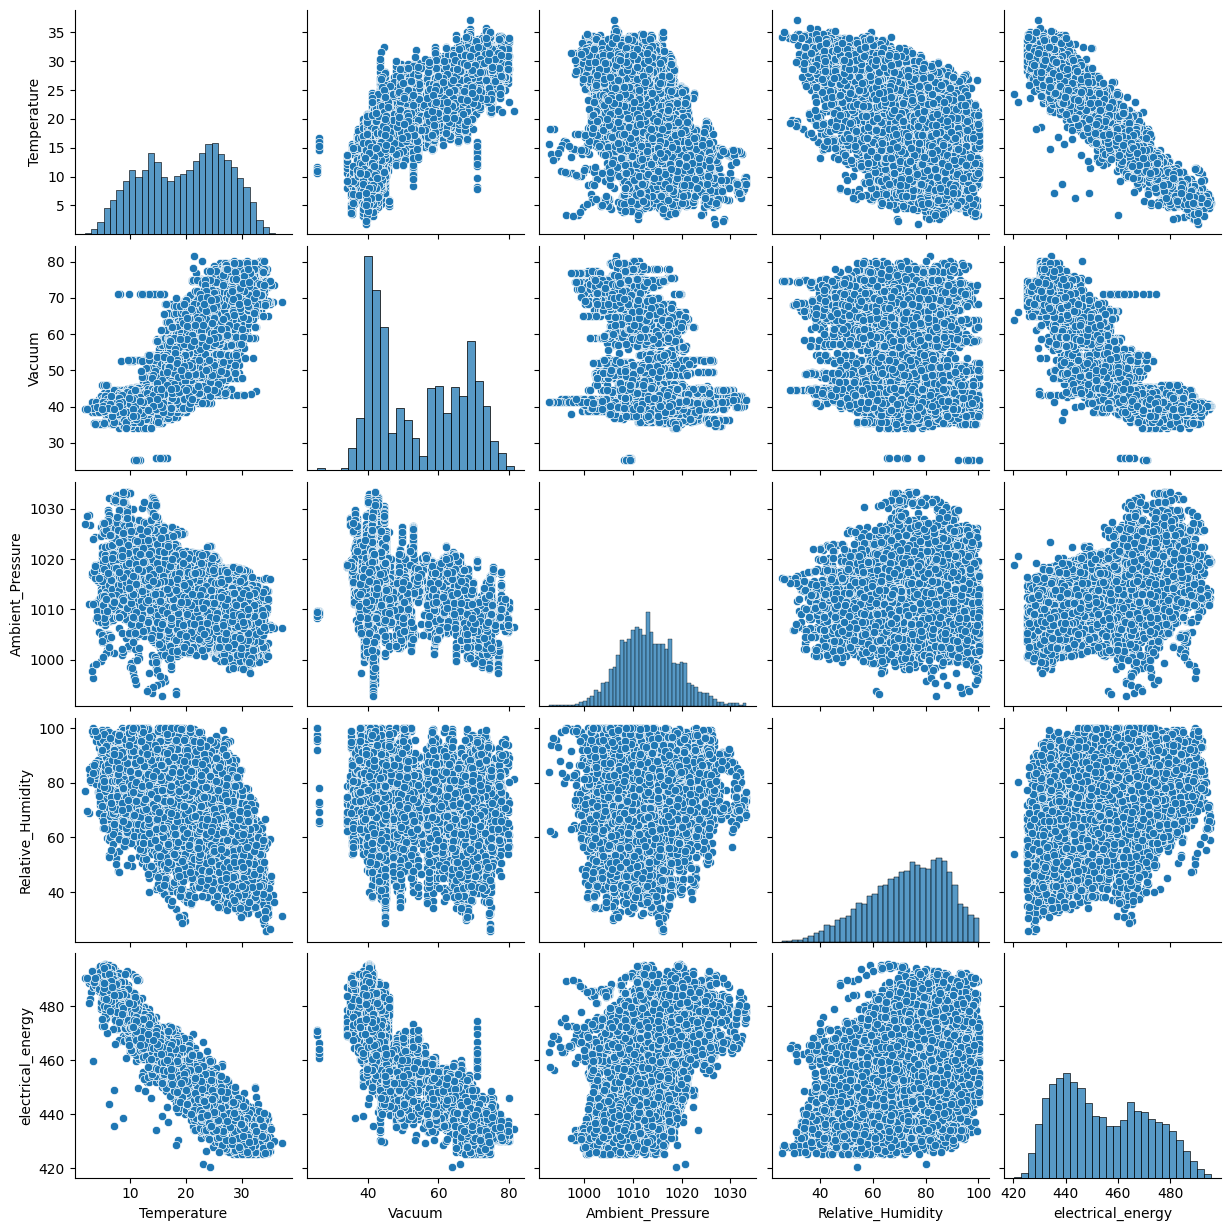

In [5]:
sns.pairplot(data=df,diag_kind="hist")

The findings are as follows:

a. As the temperature goes up Vacuum goes output electrical energy goes down

b. The output electrical energy decreases as the vacuum goes up

c. As the ambient pressure increases, the electrical energy increases gradually 

d. There is very very less effect of relative humidity for the output electrical energy 

iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [6]:
df.describe()

,Temperature,Vacuum,Ambient_Pressure,Relative_Humidity,electrical_energy
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.neighbors import LocalOutlierFactor
from statsmodels.formula.api import ols
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import normalize

                            OLS Regression Results                            
Dep. Variable:      electrical_energy   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:22:27   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     497.0341      0.156   3177.280      

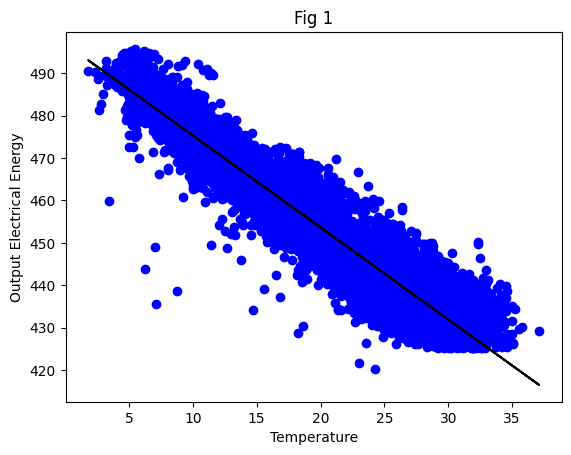

[-4.804999999999998, 44.035]
The region outside which the data points are considered as ouliers :  [-4.804999999999998, 44.035]
[]


In [8]:
X = np.array(df['Temperature']).reshape(-1, 1)
y = np.array(df['electrical_energy']).reshape(-1, 1)

df_X = df[['Temperature', 'electrical_energy']]

regressionModel = LinearRegression()
regressionModel.fit(X, y)
y_pred = regressionModel.predict(X)
sm1 = ols(formula = 'electrical_energy ~ Temperature',data = df_X).fit()
print(sm1.summary())
plt.scatter(X, y, color ='b')
plt.plot(X, y_pred, color ='k')
plt.xlabel("Temperature")
plt.ylabel("Output Electrical Energy")

plt.title("Fig 1")
plt.show()

# Outlier detection

# Interquartile range
q3,q1 = np.percentile(X, [75 ,25])
iqr_range = q3-q1

# Range outside which the data points are considered as outliers
region = [q1-1.5*iqr_range,q3+1.5*iqr_range]

print(region)

outliers = []


for i in X.ravel():
    if i<region[0] or i>region[1]:
        outliers.append(i)
        
print("The region outside which the data points are considered as ouliers : ",region)

outliers = np.array(outliers).reshape(-1,1).ravel()
print(outliers)

                            OLS Regression Results                            
Dep. Variable:      electrical_energy   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:22:27   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

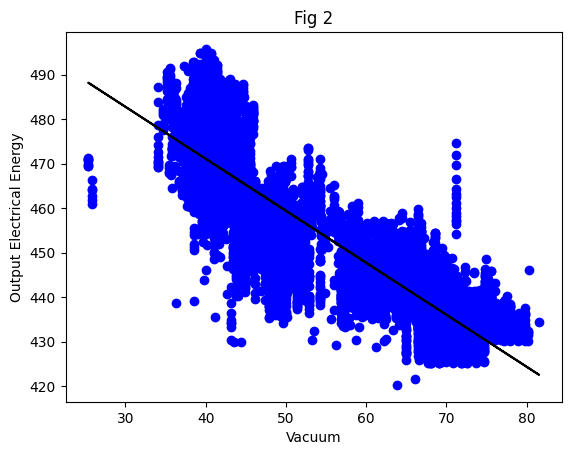

The region outside which the data points are considered as ouliers :  [4.539999999999999, 103.74000000000001]
The ouliers are : 
[]


In [9]:
X = np.array(df['Vacuum']).reshape(-1, 1)
y = np.array(df['electrical_energy']).reshape(-1, 1)

df_X = df[['Vacuum', 'electrical_energy']]

regressionModel = LinearRegression()
regressionModel.fit(X, y)
y_pred = regressionModel.predict(X)
sm1 = ols(formula = 'electrical_energy ~ Vacuum',data = df_X).fit()
print(sm1.summary())
plt.scatter(X, y, color ='b')
plt.plot(X, y_pred, color ='k')
plt.xlabel("Vacuum")
plt.ylabel("Output Electrical Energy")
plt.title("Fig 2")
  
plt.show()

# Outlier detection

# Interquartile range
q3,q1 = np.percentile(X, [75 ,25])
iqr_range = q3-q1

# Range outside which the data points are considered as outliers
region = [q1-1.5*iqr_range,q3+1.5*iqr_range]

print("The region outside which the data points are considered as ouliers : ",region)

outliers = []


for i in X.ravel():
    if i<region[0] or i>region[1]:
        outliers.append(i)
        
print("The ouliers are : ")

outliers = np.array(outliers).reshape(-1,1).ravel()
print(outliers)

                            OLS Regression Results                            
Dep. Variable:      electrical_energy   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:22:28   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1055.2610     25.459  

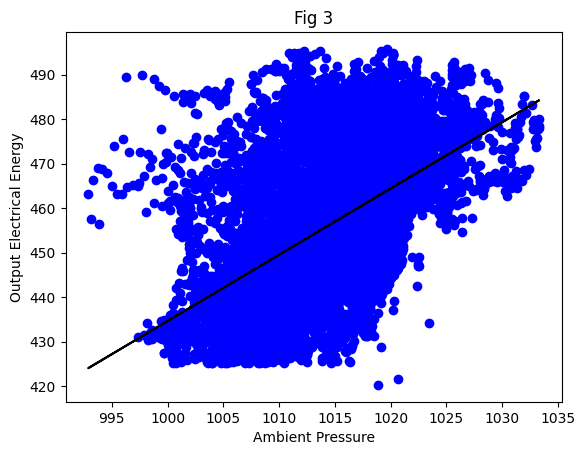

The region outside which the data points are considered as ouliers :  [996.8600000000001, 1029.5]
The ouliers are : 
[1030.46 1033.25 1030.18 1031.1  1029.65 1029.8  1033.04 1033.3  1032.67
 1033.08  994.17  995.88  995.24 1031.55  996.32 1029.6  1030.3  1031.5
 1030.94  996.55 1030.83 1031.96  996.35 1031.01 1030.77 1032.98 1032.93
 1031.33  996.03 1030.86 1030.72 1033.19 1031.96 1030.42 1032.86 1032.77
 1029.63 1033.09 1030.82 1029.99 1031.8  1032.08  993.31 1033.14 1029.54
 1032.88 1029.7  1030.81 1030.    995.45 1030.2  1032.72 1031.45 1032.14
 1029.91  995.02 1031.14  993.82 1032.83 1032.37 1032.16 1031.16 1030.72
 1029.9   994.6  1030.1  1029.61  993.74 1031.39 1031.2  1031.27 1030.38
 1031.97 1033.29 1031.58 1031.08  993.11 1031.75 1029.54 1029.7  1031.21
 1031.34 1030.68  992.89 1031.71 1031.21 1031.32 1030.61]


In [10]:
X = np.array(df['Ambient_Pressure']).reshape(-1, 1)
y = np.array(df['electrical_energy']).reshape(-1, 1)

df_X = df[['Ambient_Pressure', 'electrical_energy']]

regressionModel = LinearRegression()
regressionModel.fit(X, y)
y_pred = regressionModel.predict(X)
sm1 = ols(formula = 'electrical_energy ~ Ambient_Pressure',data = df_X).fit()
print(sm1.summary())
plt.scatter(X, y, color ='b')
plt.plot(X, y_pred, color ='k')
plt.xlabel("Ambient Pressure")
plt.ylabel("Output Electrical Energy")
plt.title("Fig 3")
  
plt.show()


# Outlier detection

# Interquartile range
q3,q1 = np.percentile(X, [75 ,25])
iqr_range = q3-q1

# Range outside which the data points are considered as outliers
region = [q1-1.5*iqr_range,q3+1.5*iqr_range]

print("The region outside which the data points are considered as ouliers : ",region)

outliers = []


for i in X.ravel():
    if i<region[0] or i>region[1]:
        outliers.append(i)
        
print("The ouliers are : ")

outliers = np.array(outliers).reshape(-1,1).ravel()
print(outliers)

                            OLS Regression Results                            
Dep. Variable:      electrical_energy   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:22:28   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           420.9618      0.82

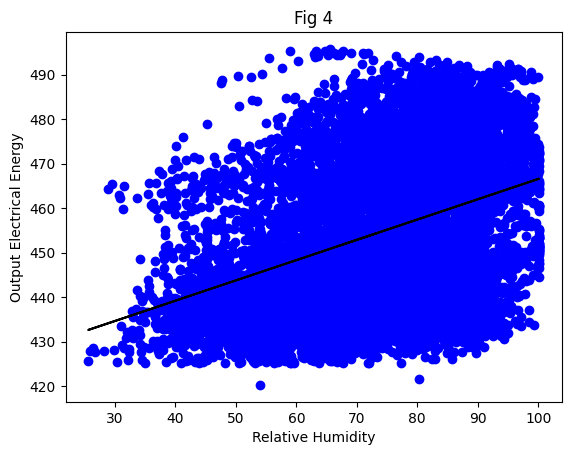

The region outside which the data points are considered as ouliers :  [31.073750000000004, 117.08375]
The ouliers are : 
[25.89 28.16 29.43 26.67 29.86 30.59 25.56 30.83 28.81 26.3  30.34 30.99]


In [11]:
X = np.array(df['Relative_Humidity']).reshape(-1, 1)
y = np.array(df['electrical_energy']).reshape(-1, 1)

df_X = df[['Relative_Humidity', 'electrical_energy']]


regressionModel = LinearRegression()
regressionModel.fit(X, y)
y_pred = regressionModel.predict(X)
sm1 = ols(formula = 'electrical_energy ~ Relative_Humidity',data = df_X).fit()
print(sm1.summary())
plt.scatter(X, y, color ='b')
plt.plot(X, y_pred, color ='k')
plt.xlabel("Relative Humidity")
plt.ylabel("Output Electrical Energy")
plt.title("Fig 4")
  
plt.show()

# Outlier detection

# Interquartile range
q3,q1 = np.percentile(X, [75 ,25])
iqr_range = q3-q1

# Range outside which the data points are considered as outliers
region = [q1-1.5*iqr_range,q3+1.5*iqr_range]

print("The region outside which the data points are considered as ouliers : ",region)

outliers = []


for i in X.ravel():
    if i<region[0] or i>region[1]:
        outliers.append(i)
        
print("The ouliers are : ")

outliers = np.array(outliers).reshape(-1,1).ravel()
print(outliers)

As we can see from the above results that for every feature the P value is 0, hence all of the predictors are statistically significant.

a. From the Fig 1, we can see that the plot has the negative slope, therefore as the temperature increases the output electrical energy decreases.

b. From Fig 2, again the slope is negative, hence as the vacuum value increases, the output electrical energy decreases.

c. From Fig 3, slope of the plot is positive, therefore the output electrical energy increases as the ambient pressure increases.

d. From Fig 4, again the output electrical energy increases with increase in the relative humidity.

## (d) Fit a multiple regression model to predict the response using all of the  predictors.Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?


In [12]:
X = np.array(df.iloc[:,:-1])
y = np.array(df['electrical_energy']).reshape(-1, 1)
df_X  = df[['Temperature', 'Vacuum', 'Ambient_Pressure', 'Relative_Humidity','electrical_energy']]
df_y = df['electrical_energy']

multiple_regressionModel = LinearRegression()
multiple_regressionModel.fit(X,y)
y_pred = multiple_regressionModel.predict(X)
sm_multiple = ols(formula = 'electrical_energy ~ Temperature + Vacuum + Ambient_Pressure + Relative_Humidity',data = df_X).fit()
print(sm_multiple.summary())


                            OLS Regression Results                            
Dep. Variable:      electrical_energy   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:22:29   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           454.6093      9.74

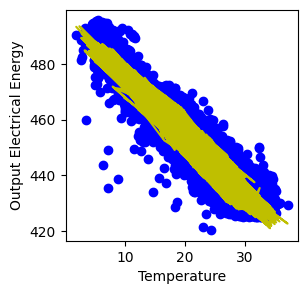

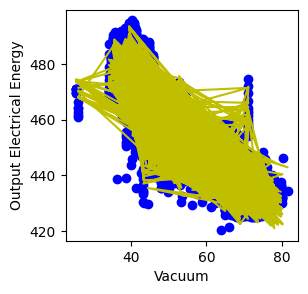

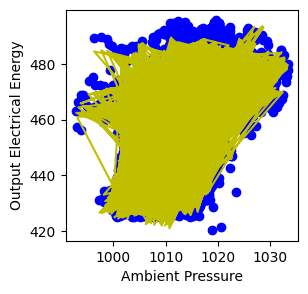

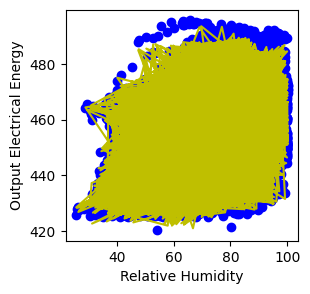

In [13]:
plt.figure(figsize=(3,3))
plt.scatter(X[:,0],y,c='blue')
plt.plot(X[:,0],y_pred,'y-')
plt.xlabel("Temperature")
plt.ylabel("Output Electrical Energy")
plt.show()

plt.figure(figsize=(3,3))
plt.scatter(X[:,1],y,c='blue')
plt.plot(X[:,1],y_pred,'y-')
plt.xlabel("Vacuum")
plt.ylabel("Output Electrical Energy")
plt.show()

plt.figure(figsize=(3,3))
plt.scatter(X[:,2],y,c='blue')
plt.plot(X[:,2],y_pred,'y-')
plt.xlabel("Ambient Pressure")
plt.ylabel("Output Electrical Energy")
plt.show()

plt.figure(figsize=(3,3))
plt.scatter(X[:,3],y,c='blue')
plt.plot(X[:,3],y_pred,'y-')
plt.xlabel("Relative Humidity")
plt.ylabel("Output Electrical Energy")
plt.show()

As the p-value for each and every predictor is zero, we reject Null Hypothesis for each predictor

## (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

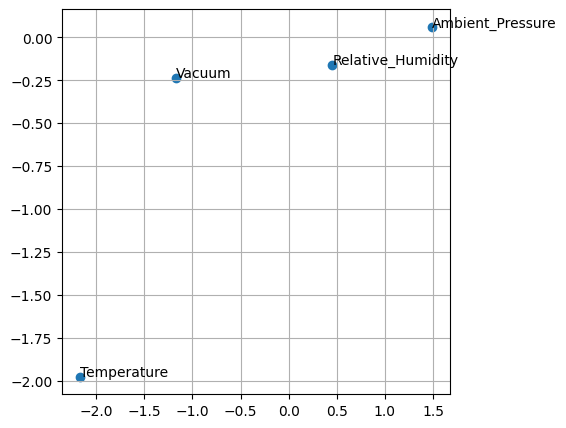

In [14]:
x1 = np.array(df['Temperature']).reshape(-1, 1)
x2 = np.array(df['Vacuum']).reshape(-1, 1)
x3 = np.array(df['Ambient_Pressure']).reshape(-1, 1)
x4 = np.array(df['Relative_Humidity']).reshape(-1, 1)
y = np.array(df['electrical_energy']).reshape(-1, 1)

def get_coefficients():
    n=0
    d=0
    for i in range(0,len(x1)):
        n = n + (x1[i]-x1.mean())*(y[i]-y.mean())
        d = d + ((x1[i]-x1.mean())**2)
    b1 = n/d
    
    n=0
    d=0
    for i in range(0,len(x2)):
        n = n + (x2[i]-x2.mean())*(y[i]-y.mean())
        d = d + ((x2[i]-x2.mean())**2)
    b2 = n/d
    
    n=0
    d=0
    for i in range(0,len(x3)):
        n = n + (x3[i]-x3.mean())*(y[i]-y.mean())
        d = d + ((x3[i]-x3.mean())**2)
    b3 = n/d
    
    n=0
    d=0
    for i in range(0,len(x4)):
        n = n + (x4[i]-x4.mean())*(y[i]-y.mean())
        d = d + ((x4[i]-x4.mean())**2)
    b4 = n/d
    
    return b1,b2,b3,b4

simple_linear_coefficients = get_coefficients()

multiple_linear_coefficients = tuple(multiple_regressionModel.coef_.reshape(1, -1)[0])
coefficients_for = ['Temperature','Vacuum','Ambient_Pressure','Relative_Humidity']

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(simple_linear_coefficients,multiple_linear_coefficients)
ax.grid()
for i, k in enumerate(coefficients_for):
     ax.annotate(k, (simple_linear_coefficients[i], multiple_linear_coefficients[i]))
plt.show()

## (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form2

                            OLS Regression Results                            
Dep. Variable:      electrical_energy   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:22:36   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             492.7281    

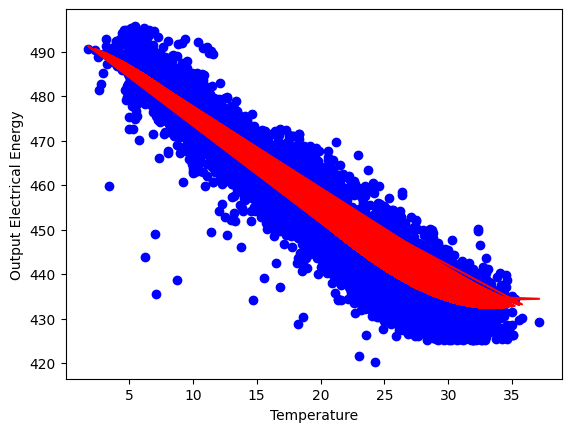

                            OLS Regression Results                            
Dep. Variable:      electrical_energy   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:22:36   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        554.1468      9.151     60.

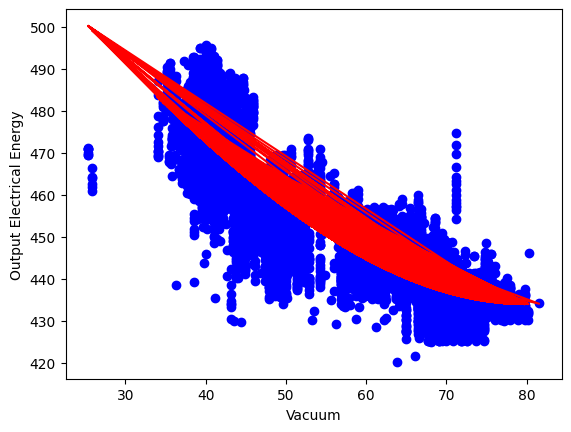

                            OLS Regression Results                            
Dep. Variable:      electrical_energy   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:22:37   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

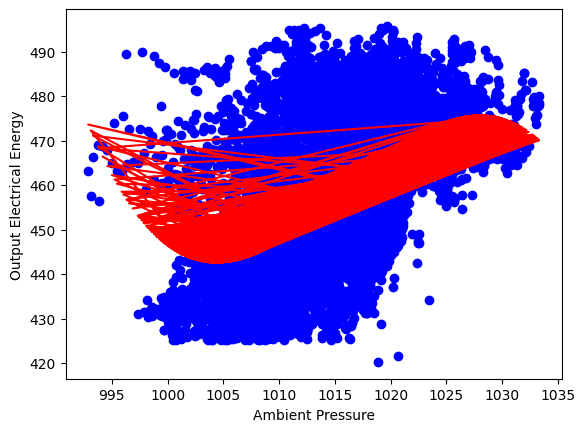

                            OLS Regression Results                            
Dep. Variable:      electrical_energy   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:22:38   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

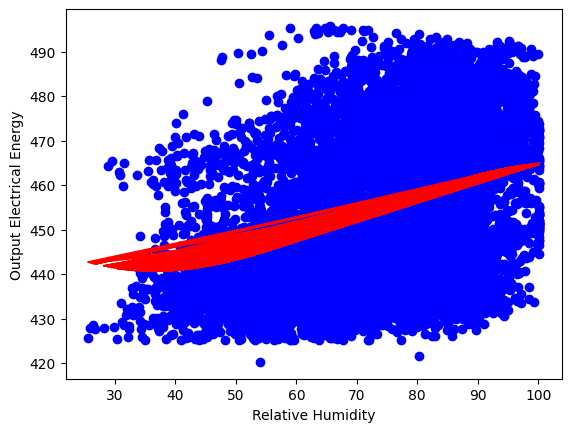

In [15]:
X = df[['Temperature','electrical_energy']]

poly = PolynomialFeatures(degree = 3)
temperature_polynomial = poly.fit_transform(x1)
poly.fit(temperature_polynomial,y)
linMod = LinearRegression()
linMod.fit(temperature_polynomial, y)
plt.scatter(x1, y, color ='b')
plt.plot(x1, linMod.predict(temperature_polynomial), color ='r')
plt.xlabel("Temperature")
plt.ylabel("Output Electrical Energy")
sm1 = ols(formula = 'electrical_energy ~ Temperature + I(Temperature**2) + I(Temperature**3)',data = X).fit()
poly_temp = sm1.summary()
print(poly_temp)
plt.show()

X = df[['Vacuum','electrical_energy']]
poly = PolynomialFeatures(degree = 3)
vacuum_polynomial = poly.fit_transform(x2)
poly.fit(temperature_polynomial,y)
linMod = LinearRegression()
linMod.fit(vacuum_polynomial, y)
plt.scatter(x2, y, color ='b')
plt.plot(x2, linMod.predict(vacuum_polynomial), color ='r')
plt.xlabel("Vacuum")
plt.ylabel("Output Electrical Energy")
sm1 = ols(formula = 'electrical_energy ~ Vacuum + I(Vacuum**2) + I(Vacuum**3)',data = X).fit()
poly_vacuum = sm1.summary()
print(poly_vacuum)
plt.show()

X = df[['Ambient_Pressure','electrical_energy']]
poly = PolynomialFeatures(degree = 3)
pressure_polynomial = poly.fit_transform(x3)
poly.fit(pressure_polynomial,y)
linMod = LinearRegression()
linMod.fit(pressure_polynomial, y)
plt.scatter(x3, y, color ='b')
plt.plot(x3, linMod.predict(pressure_polynomial), color ='r')
plt.xlabel("Ambient Pressure")
plt.ylabel("Output Electrical Energy")
sm1 = ols(formula = 'electrical_energy ~ Ambient_Pressure + I(Ambient_Pressure**2) + I(Ambient_Pressure**3)',data = X).fit()
poly_pressure = sm1.summary()
print(poly_pressure)
plt.show()

X = df[['Relative_Humidity','electrical_energy']]
poly = PolynomialFeatures(degree = 3)
humidity_polynomial = poly.fit_transform(x4)
poly.fit(humidity_polynomial,y)
linMod = LinearRegression()
linMod.fit(humidity_polynomial, y)
plt.scatter(x4, y, color ='b')
plt.plot(x4, linMod.predict(humidity_polynomial), color ='r')
plt.xlabel("Relative Humidity")
plt.ylabel("Output Electrical Energy")
sm1 = ols(formula = 'electrical_energy ~ Relative_Humidity + I(Relative_Humidity**2) + I(Relative_Humidity**3)',data = X).fit()
poly_humidity = sm1.summary()
print(poly_humidity)
plt.show()

a. For temperature, the p-values are 0 (null hypothesis can be neglected), hence there is an evidence of nonlinear association between temperature and output electrical energy

b. For vacuum, the 2nd degree p-value is greater than 0.05, hence we cannot neglect the null hypothesis, therefore we cannot say that there is an evidence of nonlinear association between vacuum and output electrical energy 

c. For ambient pressure, the p-values are 0 (null hypothesis can be neglected), hence there is an evidence of nonlinear association between pressure and output electrical energy

d. For relative humidity, the p-values are 0 (null hypothesis can be neglected), hence there is an evidence of nonlinear association between humidity and output electrical energy

## (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [16]:
X  = df[['Temperature', 'Vacuum', 'Ambient_Pressure', 'Relative_Humidity','electrical_energy']]
y = df['electrical_energy']


sm = ols(formula = 'electrical_energy ~ Temperature + Vacuum + Ambient_Pressure + Relative_Humidity + Temperature:Vacuum  + Temperature:Ambient_Pressure + Temperature:Relative_Humidity + Vacuum:Ambient_Pressure + Vacuum:Relative_Humidity + Ambient_Pressure:Relative_Humidity',data = X).fit()
ppoly = sm.summary()
print(ppoly)



                            OLS Regression Results                            
Dep. Variable:      electrical_energy   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:22:39   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

a. From the table, the interaction term coefficient of temperature and vacuum is statistically significant as p-value is 0 and we can conclude that there is an interaction between temperature and vacuum

b. From the table, the interaction term coefficient of temperature and relative humidity is statistically significant as p-value is 0 and we can conclude that there is an interaction between temperature and relative humidity

c. From the table, the interaction term coefficient of vacuum and ambient pressure is statistically significant as p-value is 0 and we can conclude that there is an interaction between vacuum and ambient pressure

d. From the table, the interaction term coefficient of relative humidity and ambient pressure is statistically significant as p-value is 0.034 (which is less than 0.05) and we can conclude that there is an interaction between vrelative humidity and ambient pressure

## (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df[['Temperature', 'Vacuum', 'Ambient_Pressure', 'Relative_Humidity']], df['electrical_energy'], test_size=0.30, random_state=42)
X_train['electrical_energy'] = y_train
X_test['electrical_energy'] = y_test


linear_model = ols(formula = 'electrical_energy ~ Temperature + Vacuum + Ambient_Pressure + Relative_Humidity',data = X_train).fit()
train_pred = linear_model.predict(X_train)
test_pred = linear_model.predict(X_test)
train_mse = mean_squared_error(y_train,train_pred)
test_mse = mean_squared_error(y_test,test_pred)

print("The train MSE is : ", train_mse)
print("The test MSE is : ", test_mse)

print()

The train MSE is :  20.580839725738688
The test MSE is :  21.23985693822554



In [18]:
df_train = X_train.copy()
df_train['electrical_energy'] = y_train



all_possible_predictors_model = ols(formula = 'electrical_energy ~ Temperature + Vacuum + Ambient_Pressure + Relative_Humidity + I(Temperature**2) + I(Temperature**3) +I(Vacuum**2) + I(Vacuum**3) + I(Ambient_Pressure**2) + I(Ambient_Pressure**3) + I(Relative_Humidity**2) + I(Relative_Humidity**3) + Temperature:Vacuum  + Temperature:Ambient_Pressure + Temperature:Relative_Humidity + Vacuum:Ambient_Pressure + Vacuum:Relative_Humidity + Ambient_Pressure:Relative_Humidity', 
                                data = df_train).fit()

print(all_possible_predictors_model.summary())

                            OLS Regression Results                            
Dep. Variable:      electrical_energy   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     6105.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:22:39   Log-Likelihood:                -19098.
No. Observations:                6697   AIC:                         3.823e+04
Df Residuals:                    6679   BIC:                         3.835e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

From the above table we can see that Relative_Humidity^2, Relative_Humidity^3, Temperature:Ambient_Pressure, Temperature:Vacuum, Vacuum:Ambient_Pressure, Vacuum:Relative_Humidity are statistically insignificant as p-values are greater than 0.05, so we can remove that.

However, the Vacuum has the p-value greater than 0.05, but as we are keeping the interactions involving vacuum, we have to keep this predictor in our model 

In [19]:
dropping_predictors = ols(formula = 'electrical_energy ~ Temperature + Vacuum + Ambient_Pressure + Relative_Humidity + I(Temperature**2) + I(Temperature**3) +I(Vacuum**2) + I(Vacuum**3) + I(Ambient_Pressure**2) + I(Ambient_Pressure**3) + Temperature:Relative_Humidity + Ambient_Pressure:Relative_Humidity', 
                                data = df_train).fit()

print(dropping_predictors.summary())

                            OLS Regression Results                            
Dep. Variable:      electrical_energy   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     9302.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:22:39   Log-Likelihood:                -19146.
No. Observations:                6697   AIC:                         3.832e+04
Df Residuals:                    6685   BIC:                         3.840e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [20]:
train_pred = dropping_predictors.predict(X_train)
mse_train = mean_squared_error(y_train,train_pred)

test_pred = dropping_predictors.predict(X_test)
mse_test = mean_squared_error(y_test,test_pred)

print("The train mse after dropping parameters : ", mse_train)
print("The test mse after dropping parameters : ", mse_test)

The train mse after dropping parameters :  17.811676437829522
The test mse after dropping parameters :  18.445008995541603


## (i) KNN Regression:
## i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1, 2, . . . , 100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

For raw features

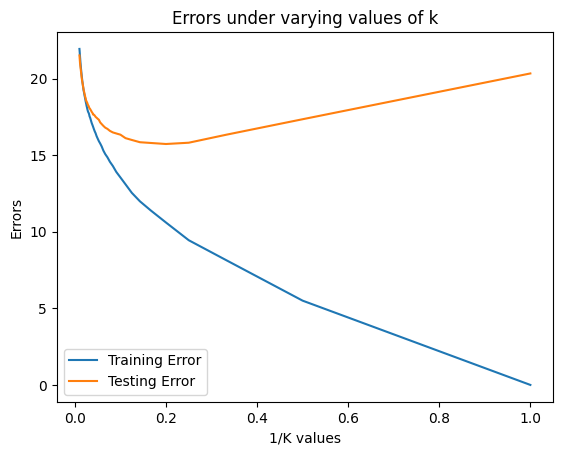

The best value of K is :  5


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df[['Temperature', 'Vacuum', 'Ambient_Pressure', 'Relative_Humidity']], df['electrical_energy'], test_size=0.30, random_state=42)

k_values = [1/k for k in range(1,101)]

best_k = 0
min_raw_test_error = float('inf')
min_raw_train_error = float('inf')
train_errors = []
test_errors = []

for k in range(1,101):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_train_pred = neigh.predict(X_train)
    train_error = mean_squared_error(y_train,y_train_pred)
    y_test_pred = neigh.predict(X_test)
    test_error = mean_squared_error(y_test,y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    if min_raw_test_error > test_error:
        min_raw_test_error = test_error
        min_raw_train_error = train_error
        best_k = k
        
plt.plot(k_values,train_errors,label='Training Error')
plt.legend(loc="best")
plt.plot(k_values,test_errors,label='Testing Error')
plt.legend(loc="best")
plt.xlabel('1/K values')
plt.ylabel('Errors')
plt.title('Errors under varying values of k') 
plt.show()

print("The best value of K is : ", best_k)

For Normalized features

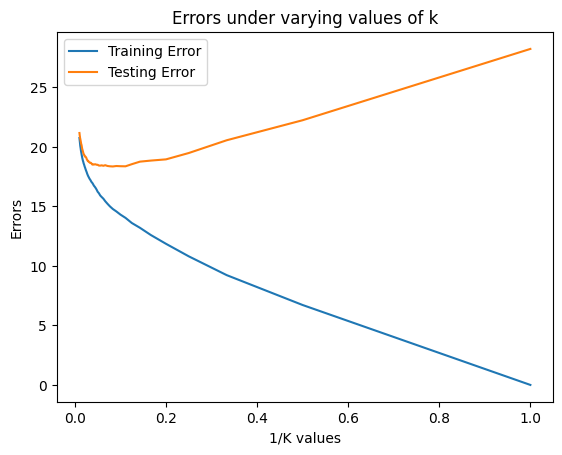

The best value of K is :  12


In [22]:
X_train_normalized = normalize(X_train)
X_test_normalized = normalize(X_test)

best_k = 0
min_nom_test_error = float('inf')
min_nom_train_error = float('inf')
train_errors = []
test_errors = []

for k in range(1,101):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train_normalized, y_train)
    y_train_pred = neigh.predict(X_train_normalized)
    train_error = mean_squared_error(y_train,y_train_pred)
    y_test_pred = neigh.predict(X_test_normalized)
    test_error = mean_squared_error(y_test,y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    if min_nom_test_error > test_error:
        min_nom_train_error = train_error
        min_nom_test_error = test_error
        best_k = k
        
        
plt.plot(k_values,train_errors,label='Training Error')
plt.legend(loc="best")
plt.plot(k_values,test_errors,label='Testing Error')
plt.legend(loc="best")
plt.xlabel('1/K values')
plt.ylabel('Errors')
plt.title('Errors under varying values of k') 
plt.show()

print("The best value of K is : ", best_k)

## (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [23]:
print("The best Train MSE for linear regression model with nonlinearity and interactions is : ",mse_train)
print("The best Test MSE for linear regression model with nonlinearity and interactions is : ",mse_test)

The best Train MSE for linear regression model with nonlinearity and interactions is :  17.811676437829522
The best Test MSE for linear regression model with nonlinearity and interactions is :  18.445008995541603


In [24]:
print("The best Train error for KNN regression with best k(k=5) for raw features is : ",min_raw_train_error)
print("The best Test error for KNN regression with best k(k=5) for raw features is : ",min_raw_test_error)

The best Train error for KNN regression with best k(k=5) for raw features is :  10.600768887561596
The best Test error for KNN regression with best k(k=5) for raw features is :  15.726819842563568


In [25]:
print("The best Train error for KNN regression with best k(k=12) for normalized features is : ",min_nom_train_error)
print("The best Test error for KNN regression with best k(k=12) for normalized features is : ",min_nom_test_error)

The best Train error for KNN regression with best k(k=12) for normalized features is :  14.7786966824905
The best Test error for KNN regression with best k(k=12) for normalized features is :  18.35373798182979


Comparisons:

The train and test error for KNN regression with k=5 for raw features are the lowest among all of the other errors, hence it is the best model obtained!

# 2. ISLR: 2.4.1

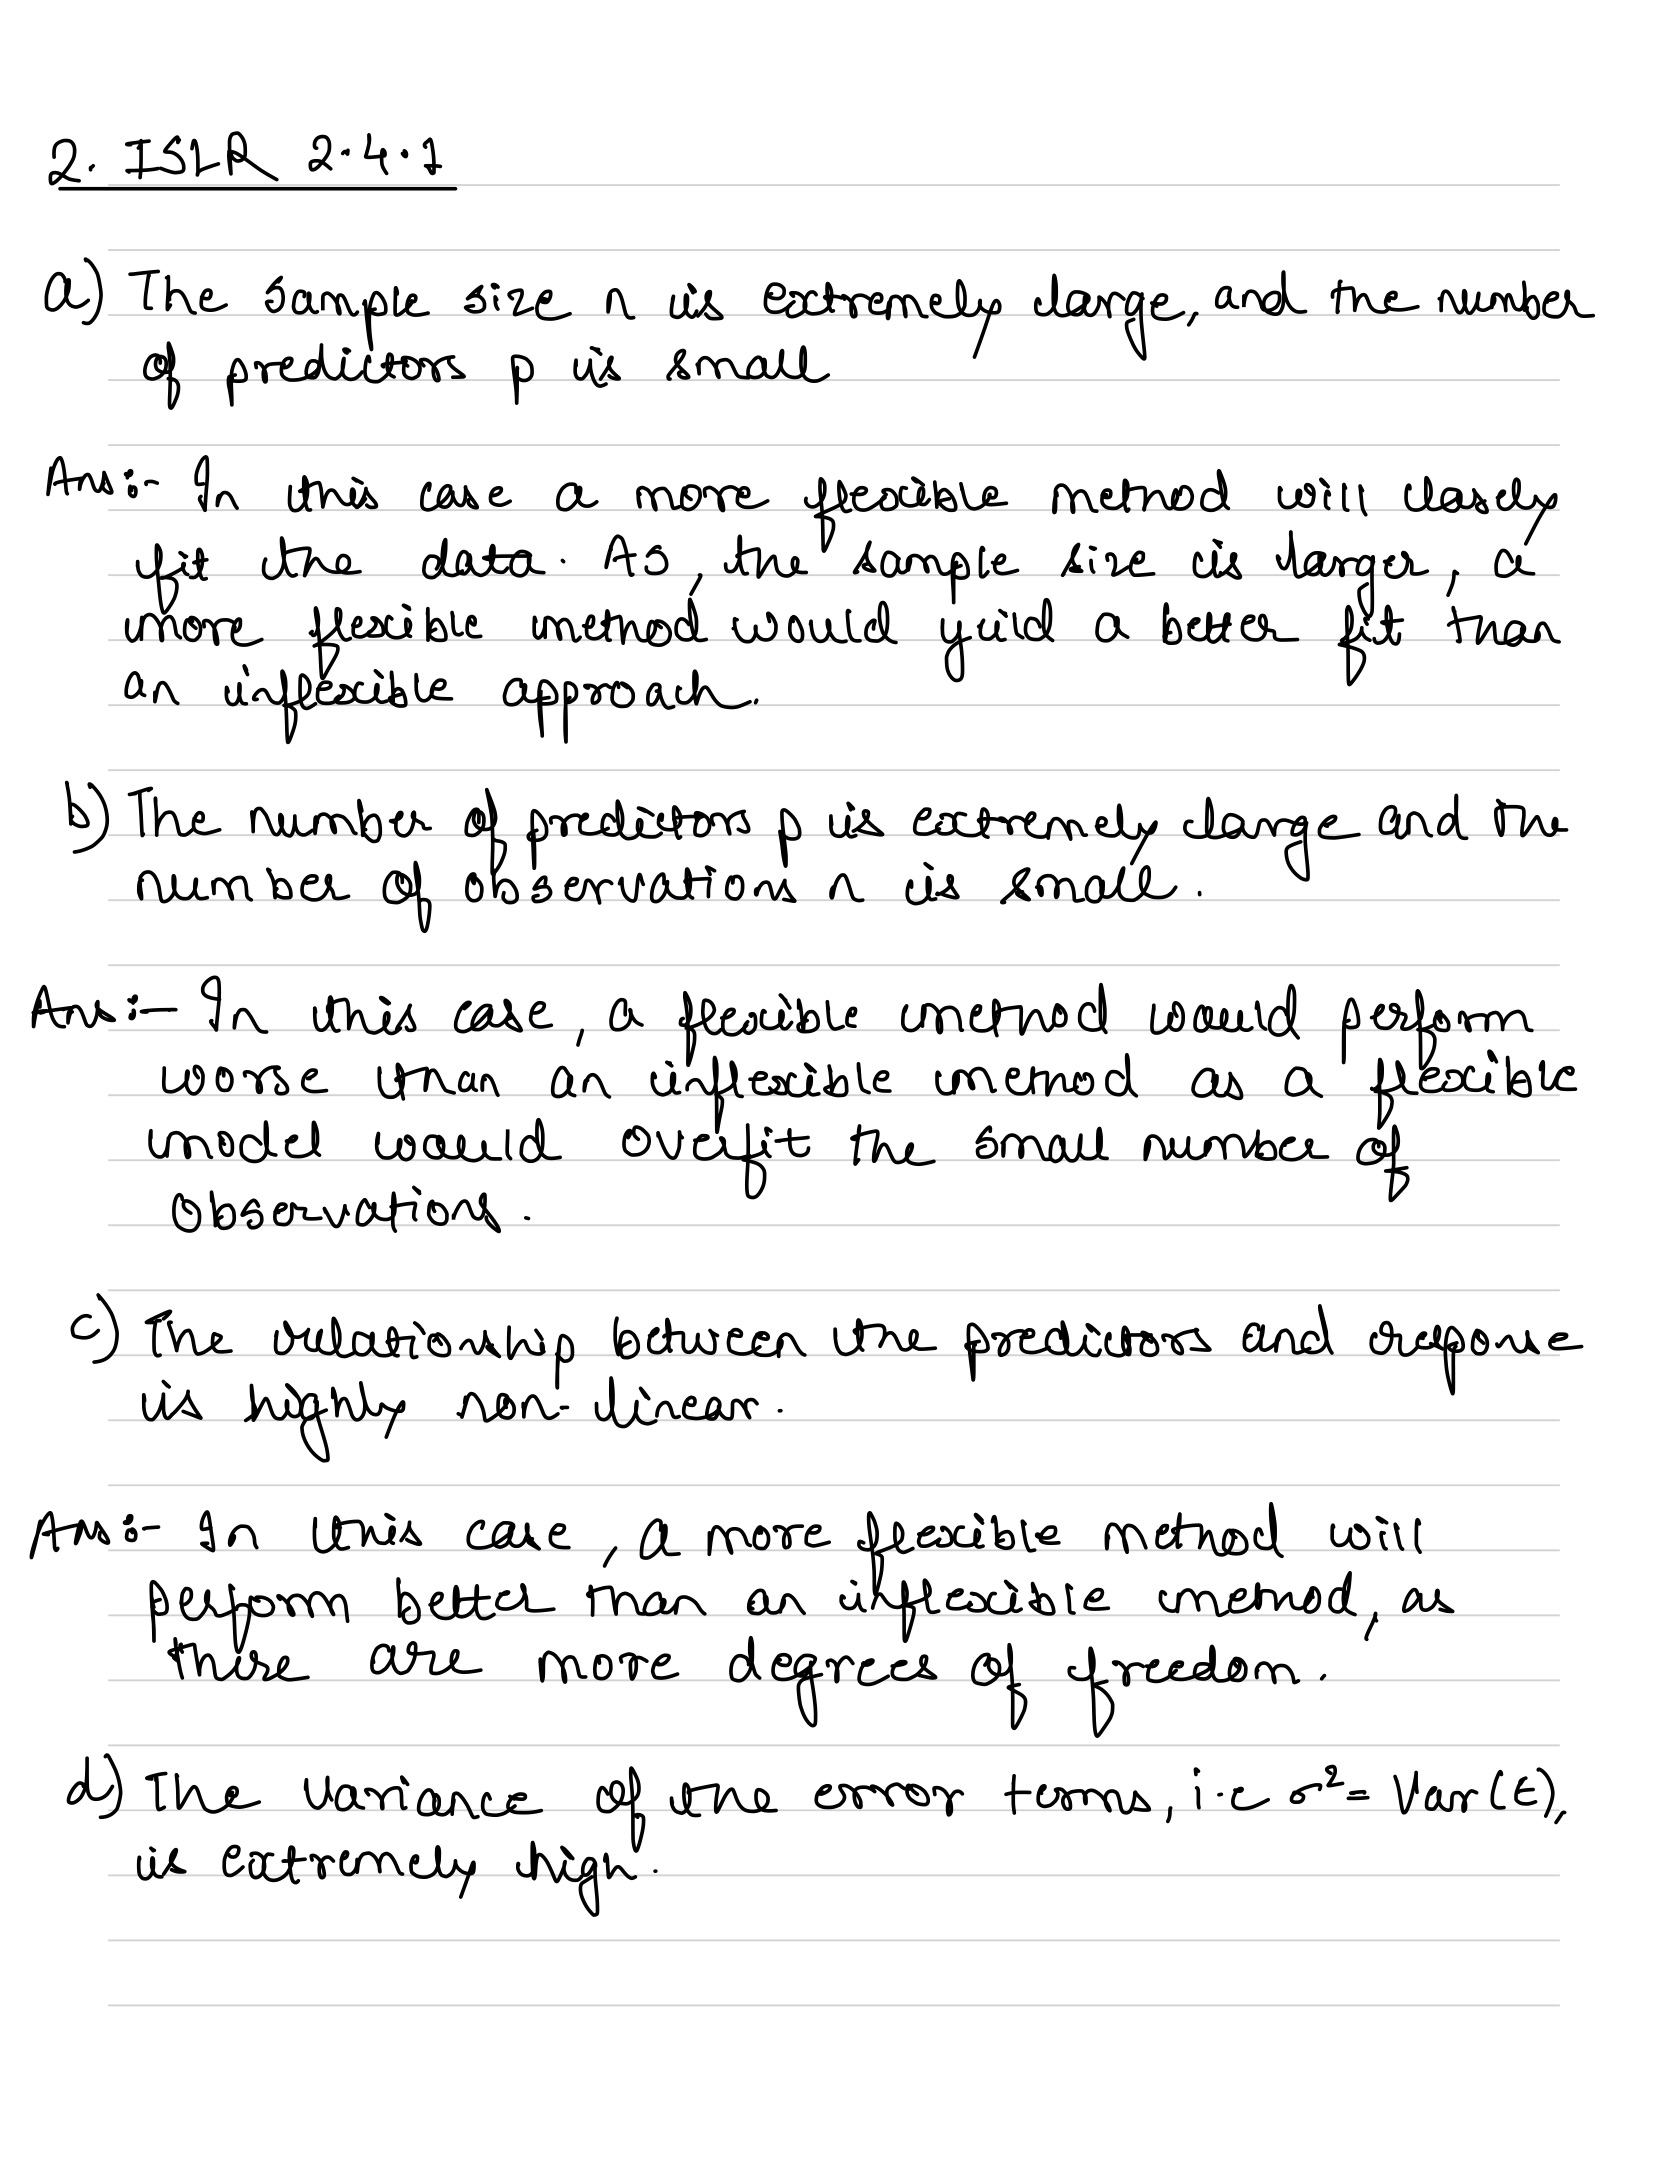

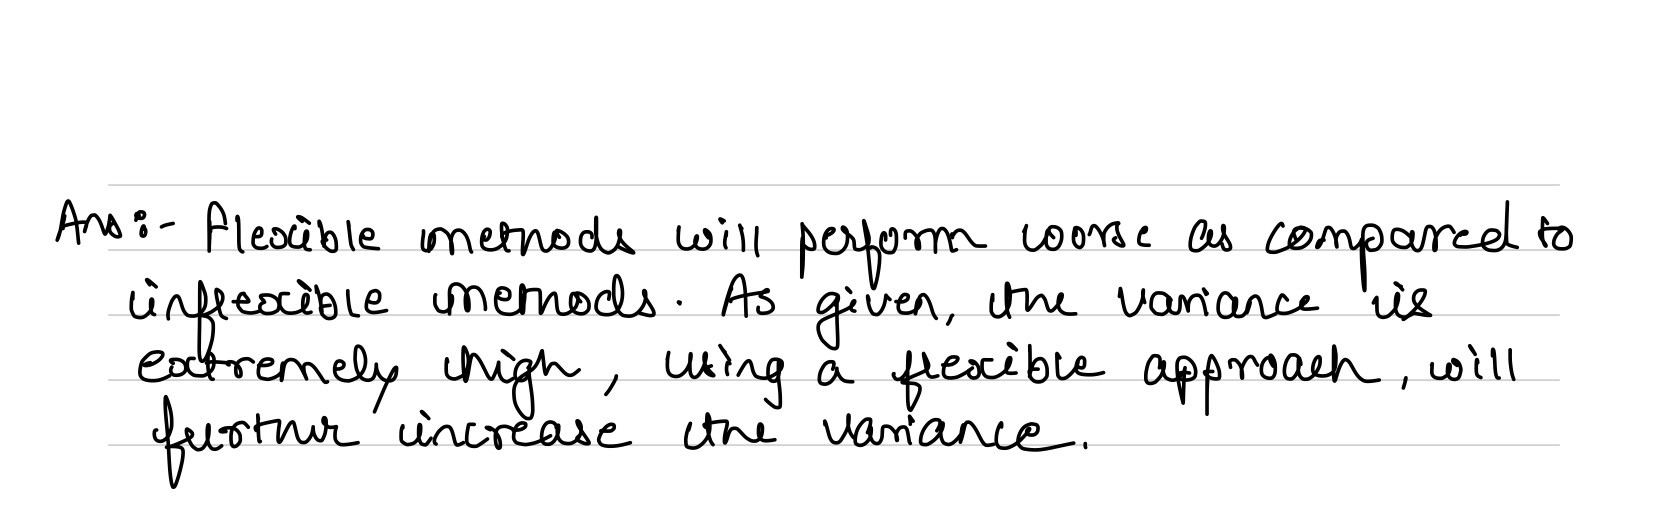

## 3. ISLR: 2.4.7

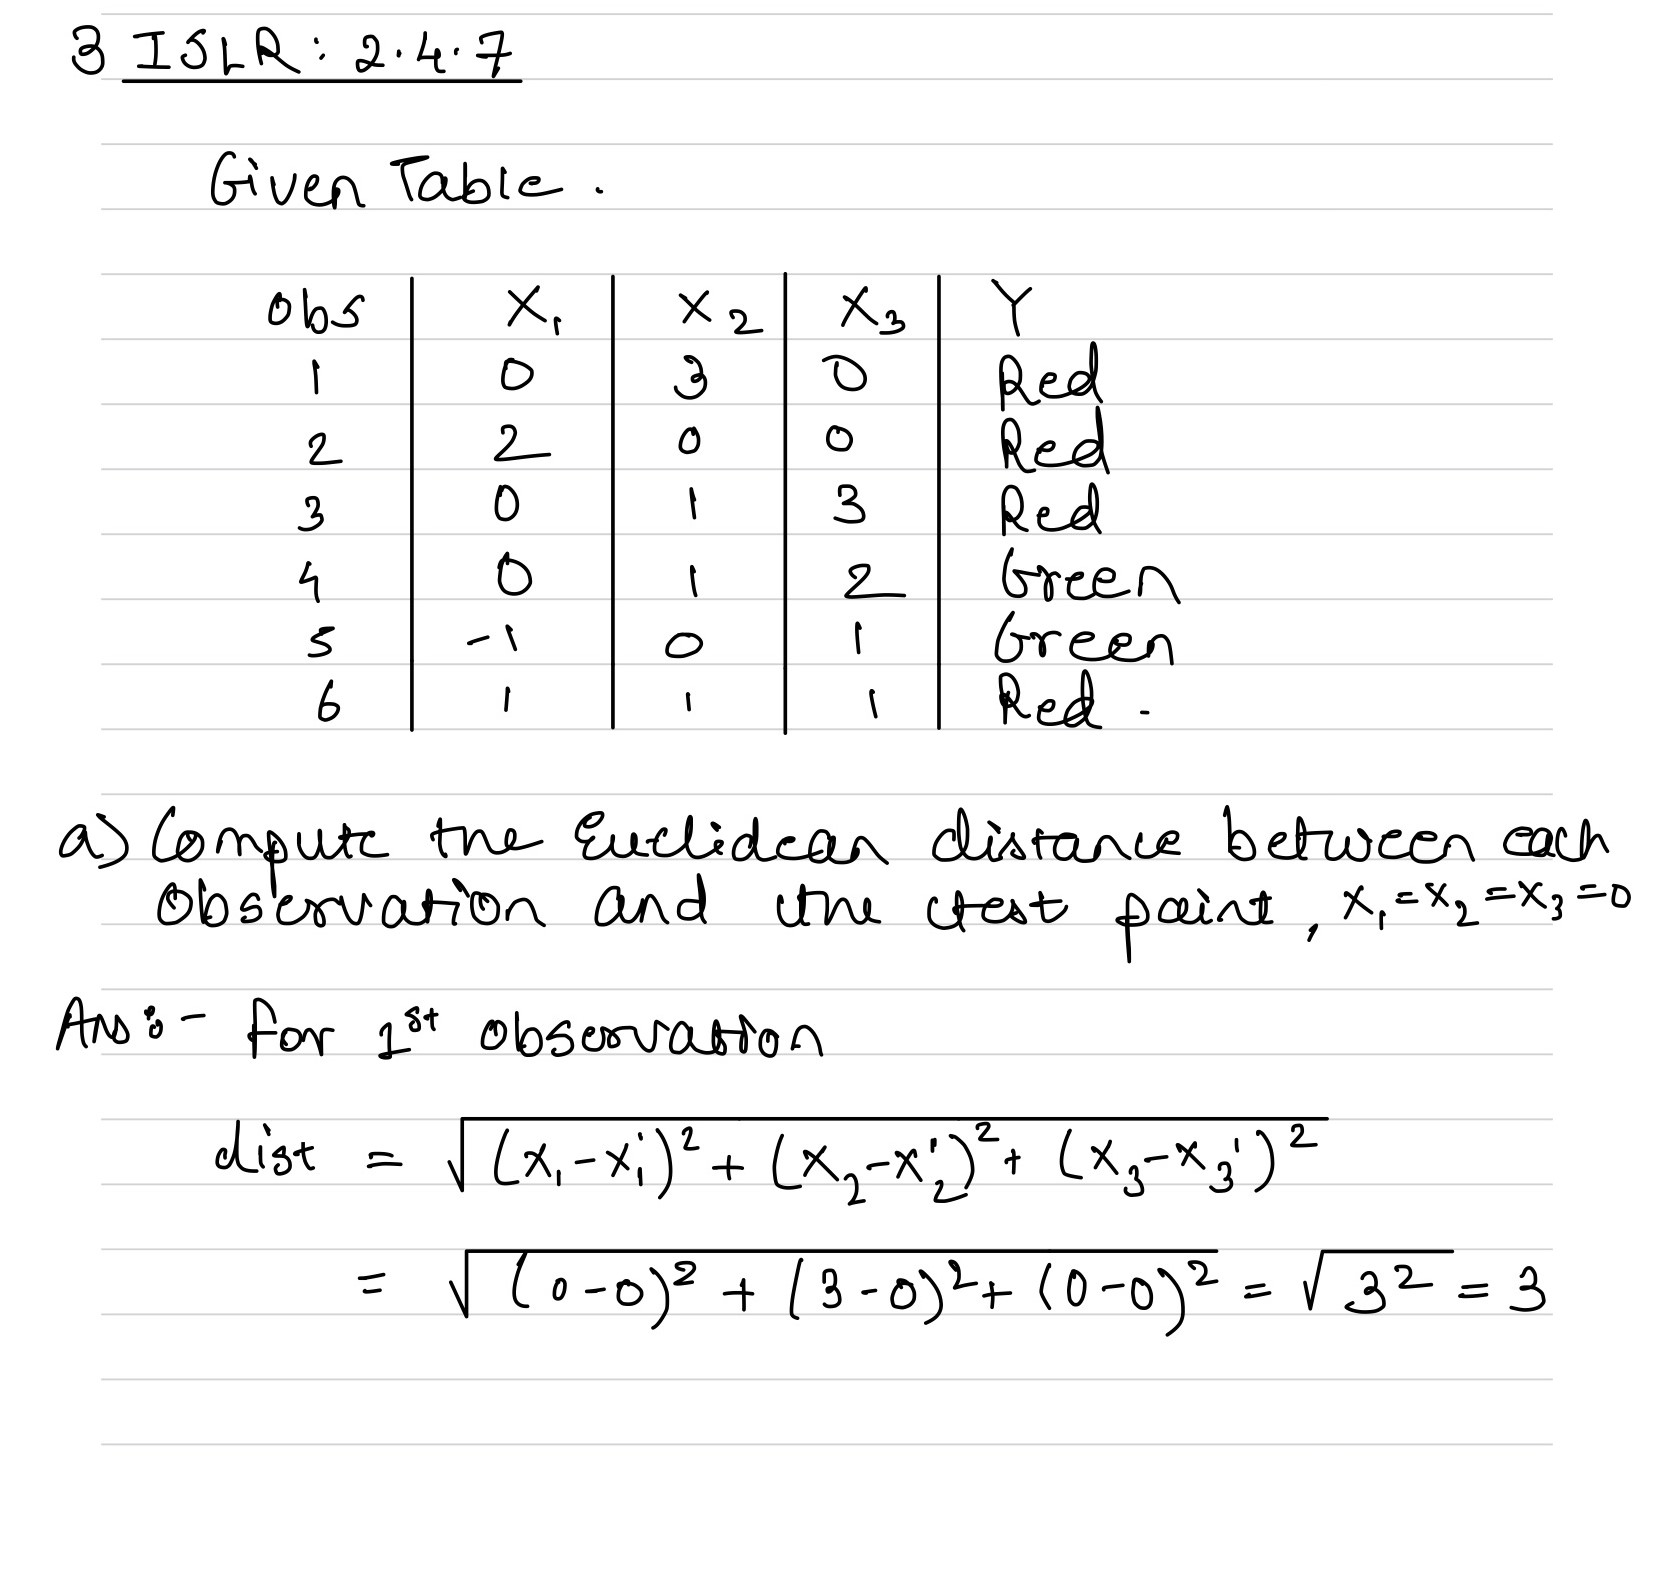

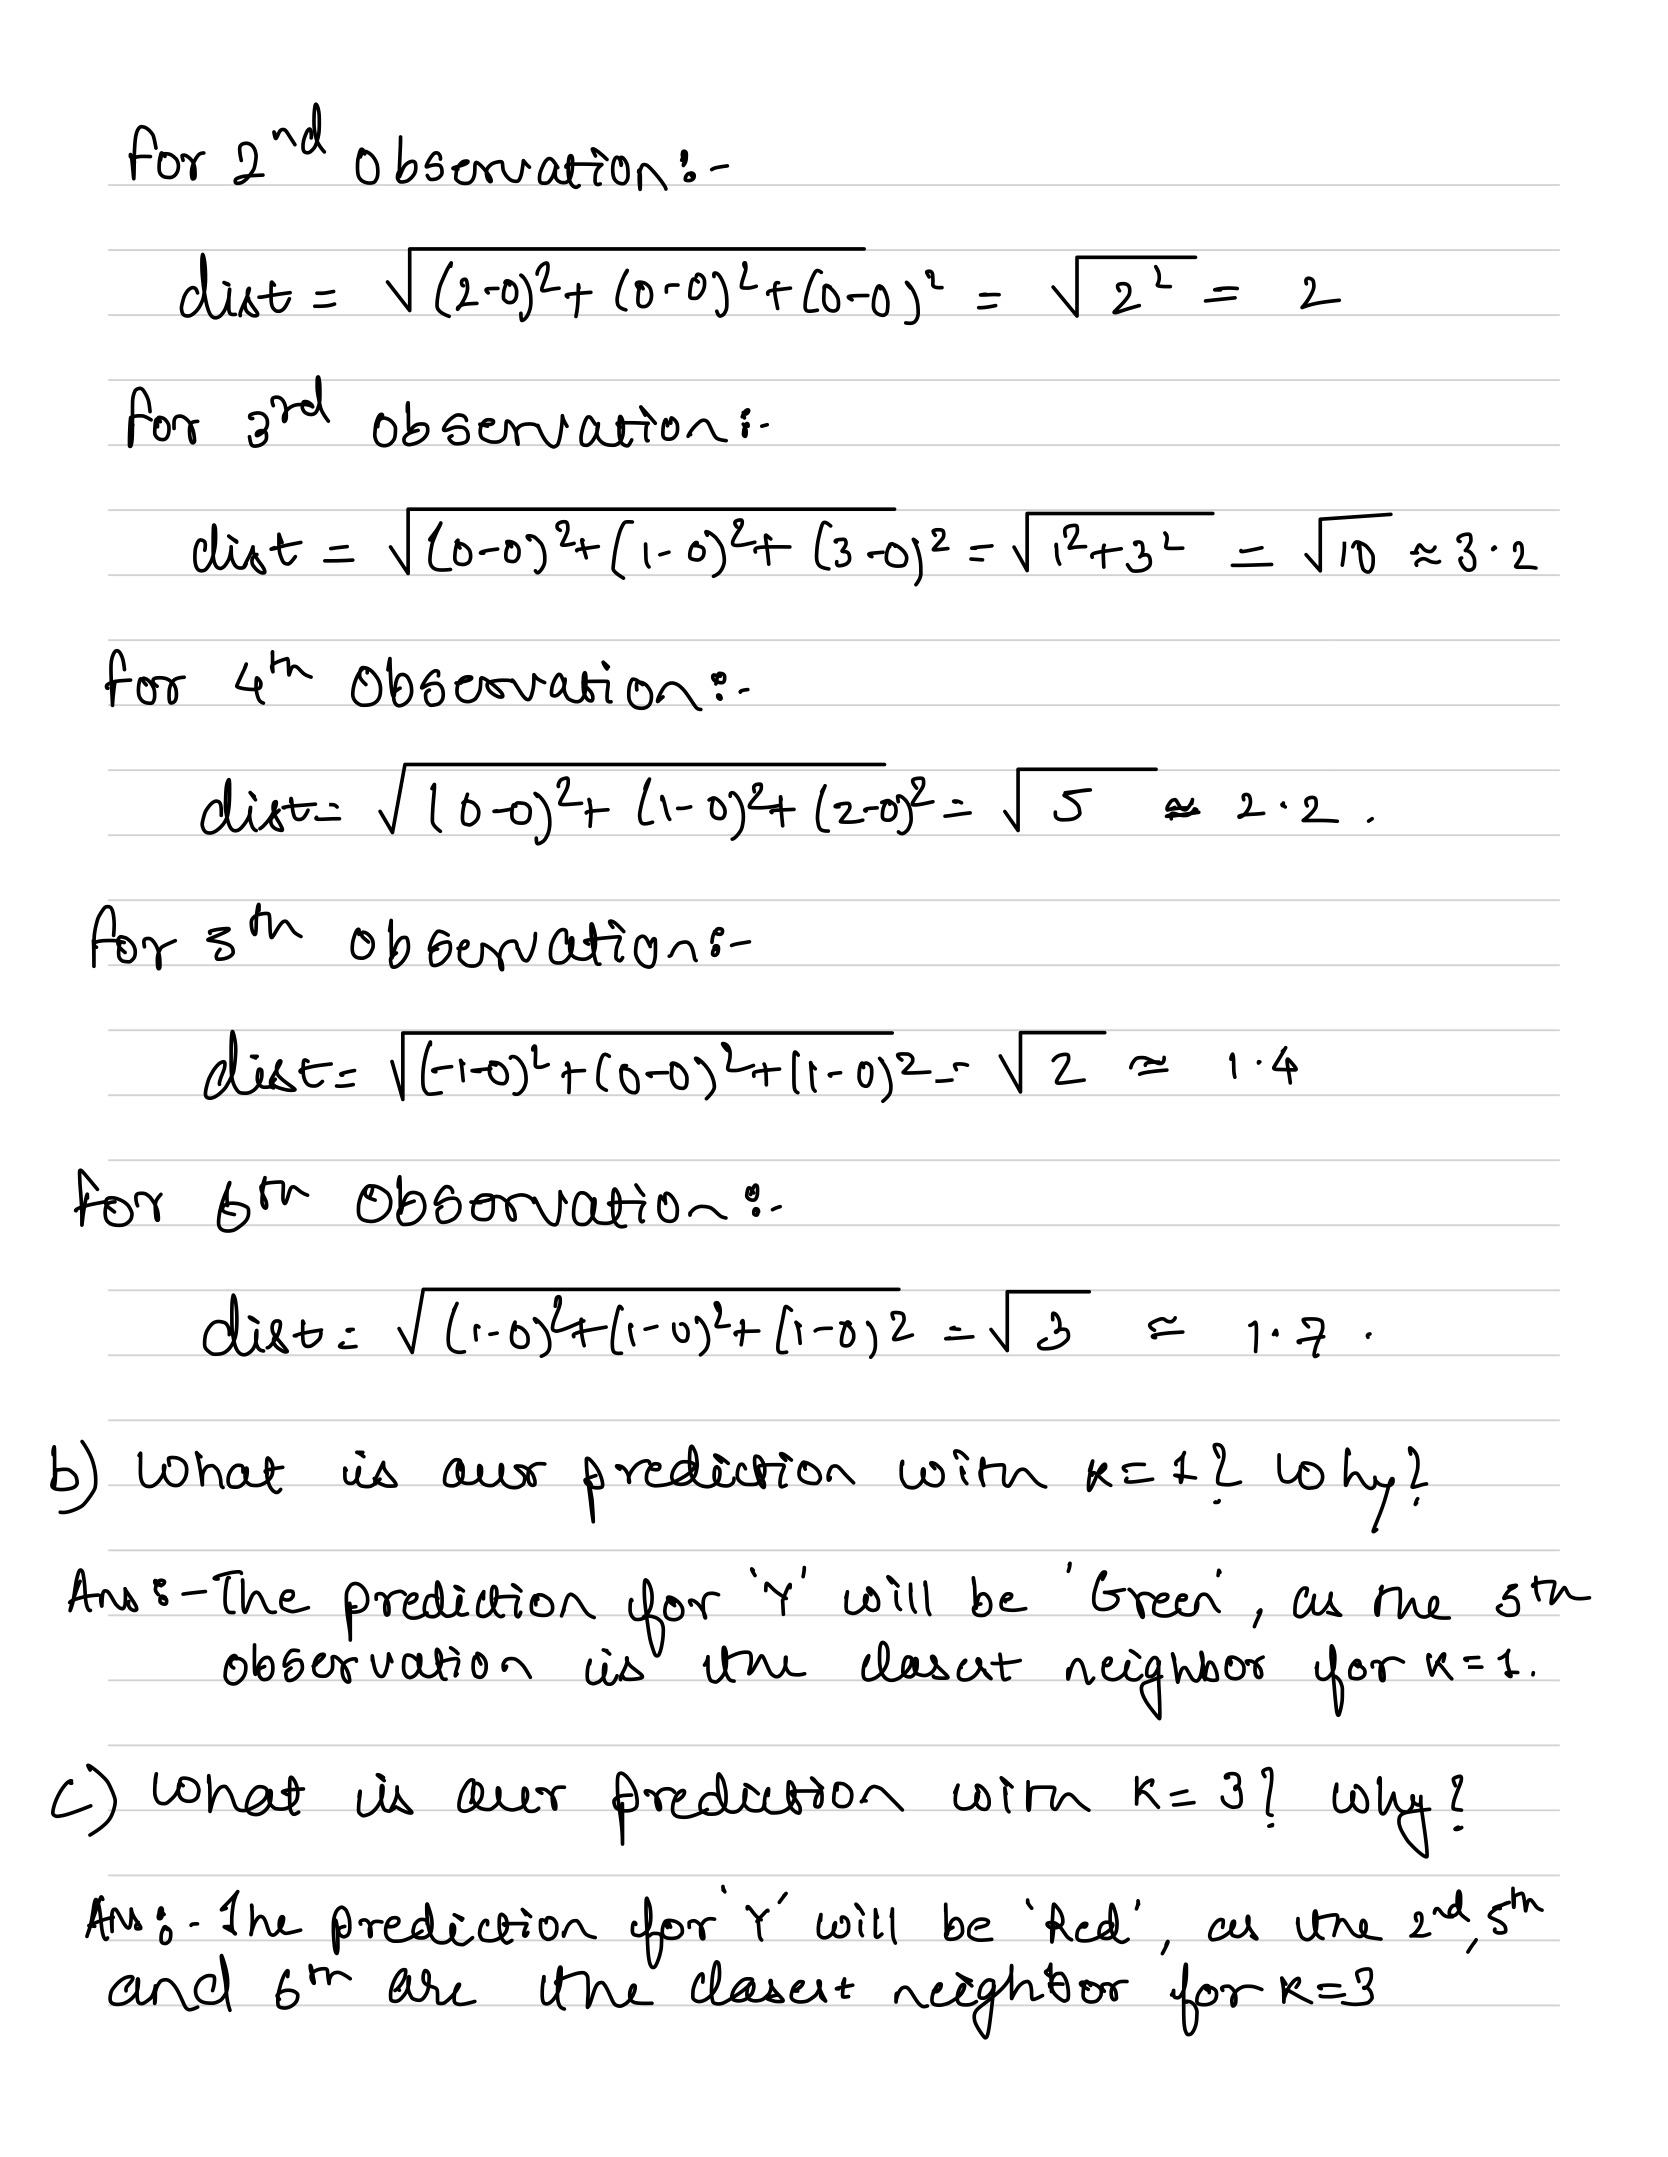

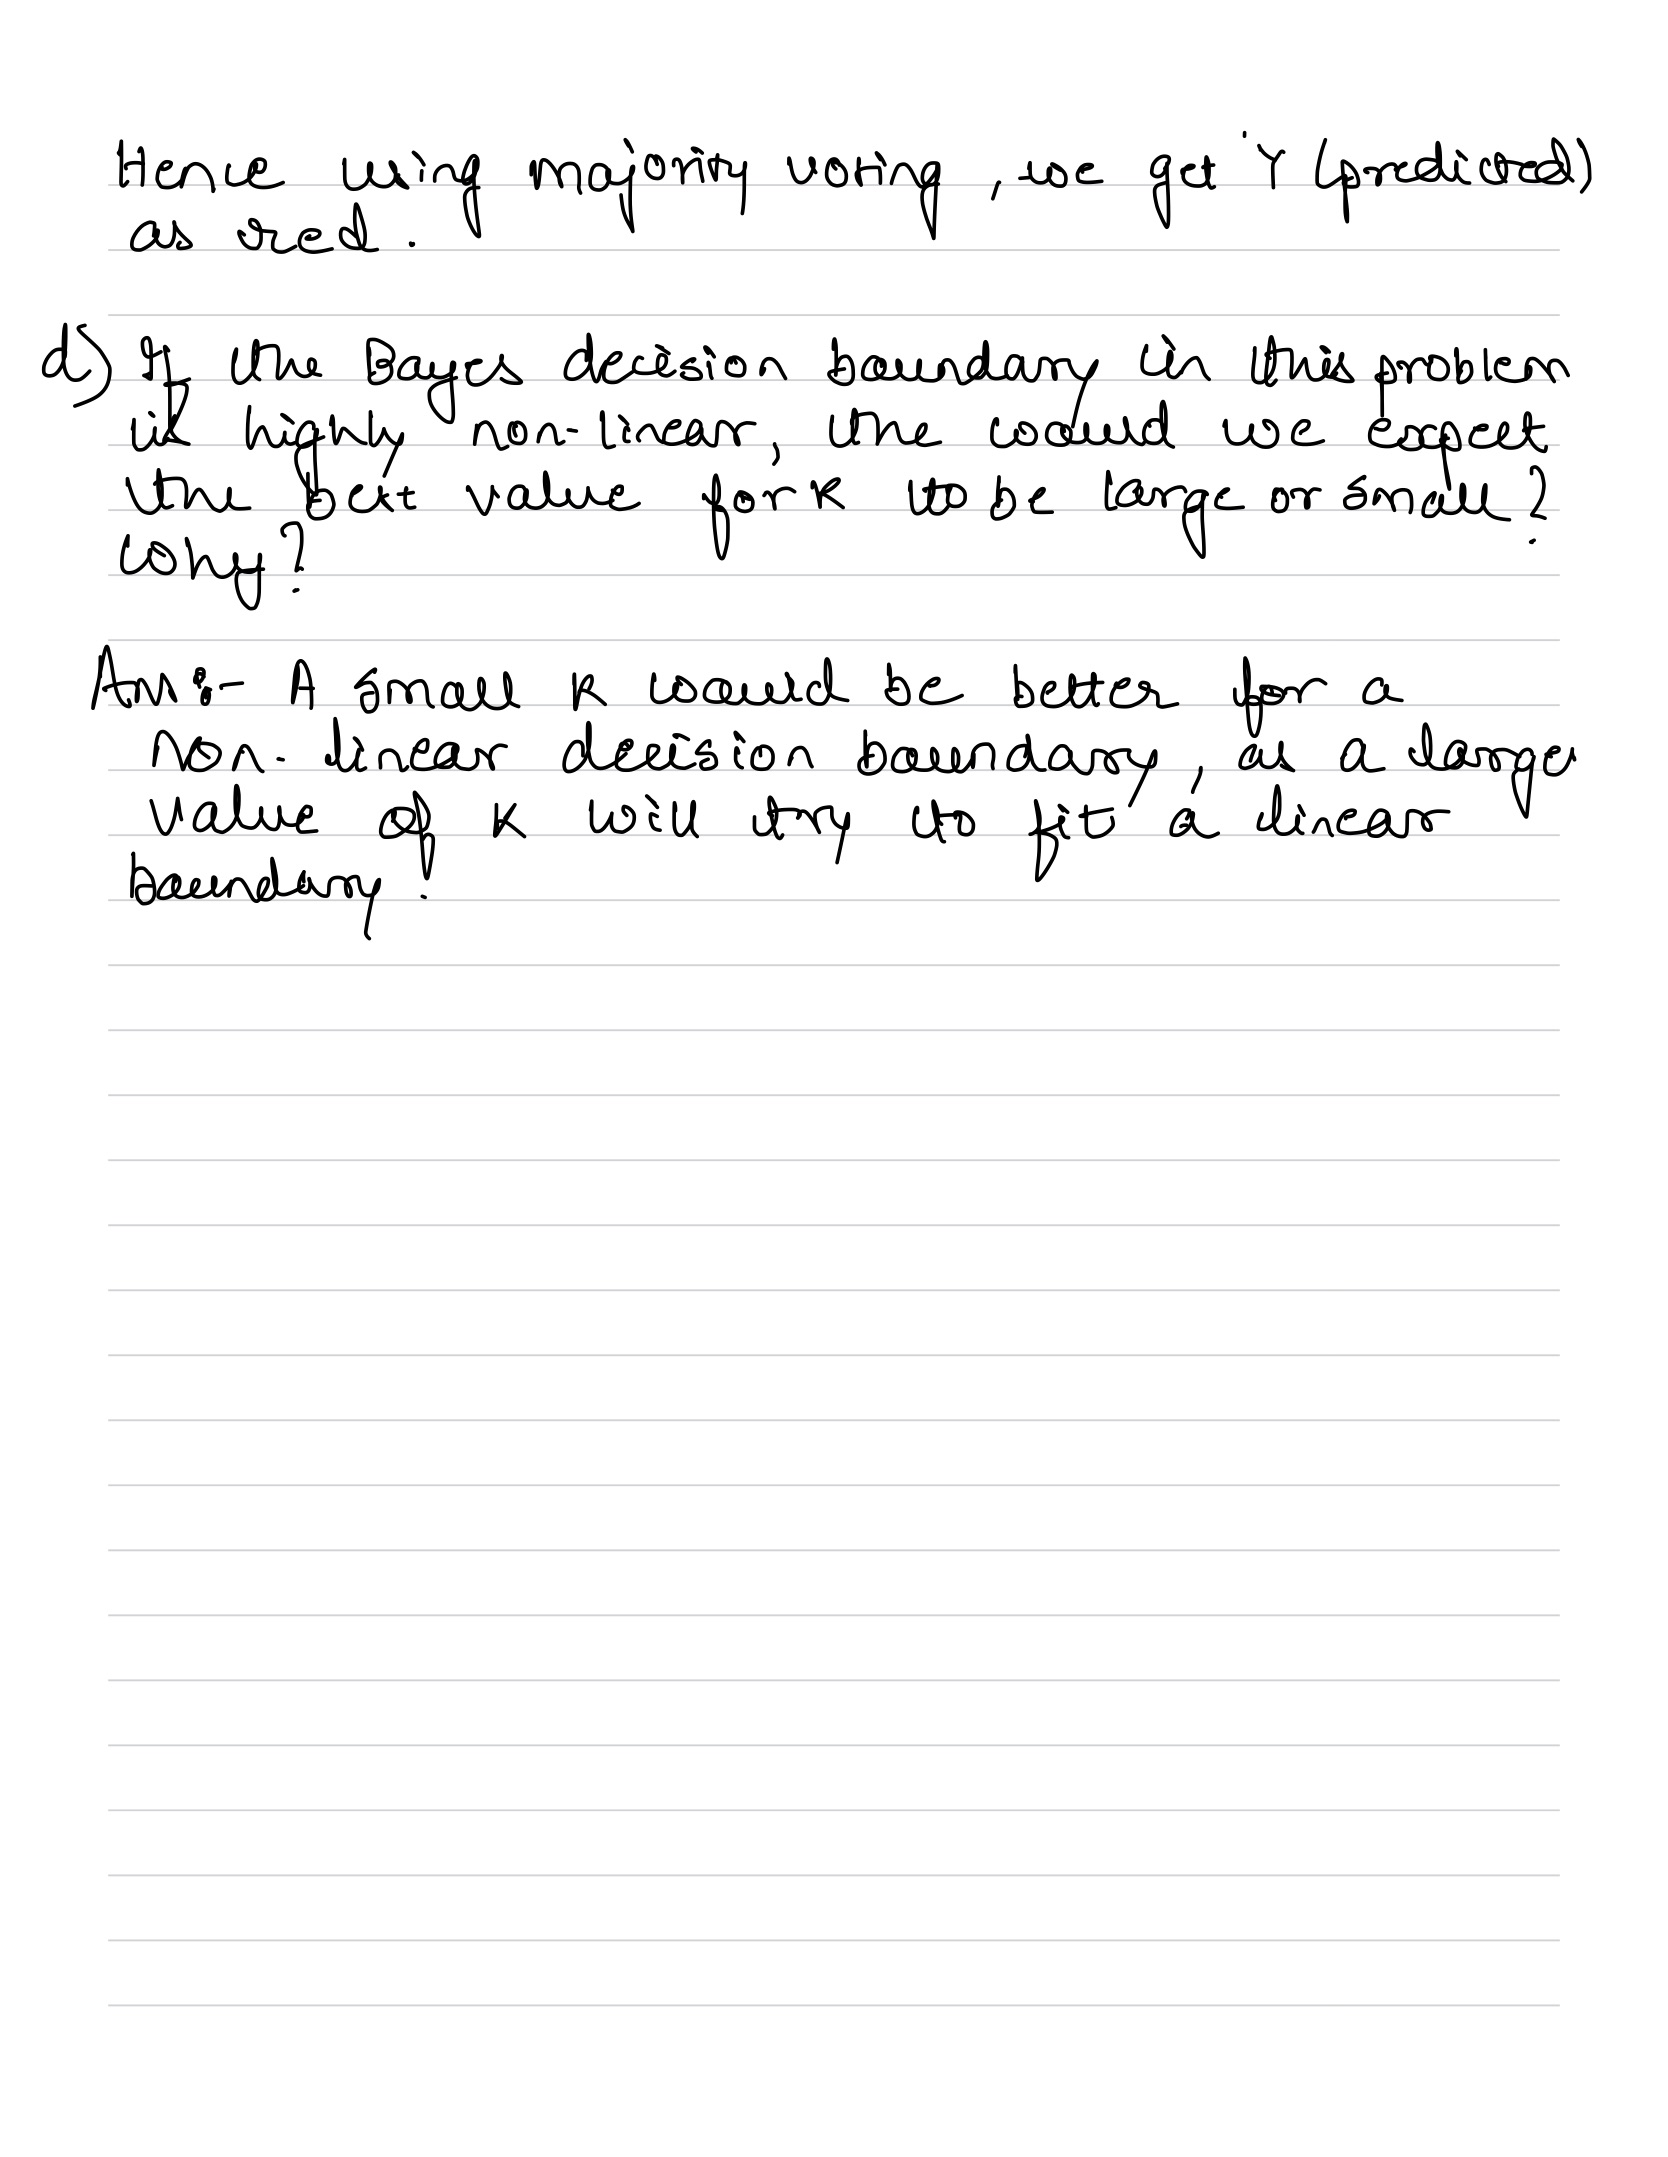